# Clinical-Trial Survival Analysis for Treatment Efficacy

## Why This Project Matters in Clinical Trials

Clinical trials help researchers answer questions like:

> “Does this new treatment help patients live longer?”

> “Do patients on Treatment A survive longer than those on Treatment B?”

> “What factors affect a patient’s chance of recovery or relapse over time?”


But in many cases, patients:

* Drop out of the trial
* Haven’t experienced the outcome yet (e.g., are still alive)

This makes the data **incomplete**, and **standard statistical methods like averages don’t work**.

So, we need **special tools** to analyze this kind of data — and that’s where **survival analysis** comes in.

---

## What This Project Does

This project helps:

1. Understand how to work with **“time-to-event” data** (e.g., time until death, recovery, or disease return).
2. Use **visual tools** like survival curves to compare treatments.
3. Perform **statistical tests** to check if one treatment is better than another.
4. Explore more complex situations, like:

   * When patient condition changes over time.
   * When different patients have different risk patterns.
   * When patients might experience different types of outcomes.

---

## The Key Models and Their Purpose

### 1. **Kaplan–Meier Survival Curve**

* Shows the **probability of surviving over time**.
* Easy to visualize and compare treatment groups.
* Helps answer:

  > “What % of patients are still alive after 6 months in each group?”

### 2. **Log-Rank Test**

* A simple statistical test.
* Helps answer:

  > “Are survival curves for Treatment A and B **significantly different**?”

### 3. **Cox Proportional Hazards Model**

* A regression model used to study **multiple risk factors at once**.
* Helps answer:

  > “How does age, gender, or treatment type affect survival?”

### 4. **Time-Varying Covariate Model**

* Used when a patient’s condition **changes during the study**.
* Helps answer:

  > “What if a patient switches treatments halfway through?”

### 5. **Stratified Cox Model**

* Used when groups have **different background risks** (like men vs. women).
* Helps give **fairer comparisons**.

### 6. **Competing Risks Model**

* Used when **multiple different outcomes** are possible (e.g., death from different causes).
* Helps prevent **misleading results** when analyzing one outcome in isolation.

---

## Why It’s Important

This project helps learn how to:

* Work with **real, messy clinical data** (with censoring and missing events).
* Think like a researcher:

  * Not just “Is it different?”, but **“How much better or worse?”**
* Apply statistical thinking to **life-saving decisions**.

---

## Real-World Impact

Hospitals, pharmaceutical companies, and public health researchers use these exact methods to:

* Approve or reject new drugs.
* Personalize treatment plans.
* Improve patient outcomes and safety.

### Step 1: Install and Import Required Libraries

```python
!pip install lifelines --quiet
```

**What it does:**

This line **installs** a Python package called `lifelines`.

**What is `lifelines`?**

`lifelines` is a special library used for **survival analysis** — a type of analysis used in medical research to study **how long something lasts** (like how long patients survive, or how long until a disease returns).

* It has tools for **Kaplan–Meier curves**, **Cox models**, **log-rank tests**, and more.
* `--quiet` just hides the long installation messages.

---

**Then we import the libraries:**

```python
from lifelines import KaplanMeierFitter, CoxPHFitter
```

Why?

You're bringing in two important tools from `lifelines`:

1. `KaplanMeierFitter`:

   * Used to **calculate and plot survival probabilities**.
   * Very common in clinical trials to show how long patients survive.

2. `CoxPHFitter`:

   * Stands for **Cox Proportional Hazards model**.
   * Used to study the **effect of treatment, age, gender, etc. on survival time**.

---

```python
from lifelines.statistics import logrank_test
```

Why?

This is a **statistical test** that helps answer:

> “Are the survival outcomes of two groups significantly different?”

For example:

> “Is Treatment A better than Treatment B based on patient survival?”

---

**In Summary:**

This block of code is **setting up the tools**, Think of it as:

Installing the right toolbox →
Loading tools for:

* Working with data (`pandas`)
* Plotting graphs (`matplotlib`)
* Running survival analysis (`lifelines`)

In [1]:
!pip install lifelines --quiet

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.5 MB/s eta 0:00:00


### **1. Load a CSV file using pandas**

```python
df = pd.read_csv('veteran.csv')
```

* `pd` is short for **pandas**, a popular Python library used for handling data tables (just like Excel).
* `read_csv()` is a function that reads data from a **CSV file** (Comma-Separated Values — a text file format for tables).
* `'veteran.csv'` is the **filename** of the CSV file you want to load. Replace this with the correct file path if needed.
* The data is stored in a variable named `df`, which stands for **DataFrame** (a table with rows and columns).

Think of `df` like an Excel spreadsheet loaded into Python!

---

### **2. Show the first few rows of the data**

```python
print(df.head())
```

* `df.head()` shows the **first 5 rows** of the dataset.
* This is a quick way to look at what the data looks like — column names, values, etc.
* You can pass a number to see more rows, like `df.head(10)` for the first 10 rows.

---

### **3. Show basic information about the data**

```python
print(df.info())
```

* `df.info()` gives a summary of the dataset:

  * How many **rows** and **columns** there are
  * What the **column names** are
  * What **data types** each column has (like integer, float, string)
  * How many **missing values** there are (very important for cleaning data)

---

### What You Should See After Running This

The Output tells you:

* The dataset has 274 rows and 9 columns
* What kind of data is in each column
* Whether there are missing values (which you’ll want to clean later)


In [2]:
# Load dataset
df = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/veteran.csv')
print(df.head())
print(df.info())

   ID  TIME  Y       trt  celltype  karno  diagtime  age priortherapy
0   1     0  0  standard  squamous     60         7   69           no
1   1    72  1  standard  squamous     60         7   69           no
2   2     0  0  standard  squamous     70         5   64          yes
3   2   411  1  standard  squamous     70         5   64          yes
4   3     0  0  standard  squamous     60         3   38           no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            274 non-null    int64 
 1   TIME          274 non-null    int64 
 2   Y             274 non-null    int64 
 3   trt           274 non-null    object
 4   celltype      274 non-null    object
 5   karno         274 non-null    int64 
 6   diagtime      274 non-null    int64 
 7   age           274 non-null    int64 
 8   priortherapy  274 non-null    object
dtypes: int64(

### **Top of the Output: Table Preview**


This shows the **first 5 rows** of your data. Each **row** is one observation, and each **column** is a variable.

#### What each column means:

| Column           | Description                                                                                 |
| ---------------- | ------------------------------------------------------------------------------------------- |
| **ID**           | Patient ID. Each patient has 2 rows: one for start (Y=0), one for death or censoring (Y=1). |
| **TIME**         | Time in days: start of study (if Y=0), death or censoring (if Y=1).                         |
| **Y**            | Event indicator: `0` = start/censoring, `1` = death.                                        |
| **trt**          | Treatment type: `"standard"` or `"test"`.                                                   |
| **celltype**     | Type of lung cancer: e.g. `"squamous"`, `"smallcell"`, etc.                                 |
| **karno**        | Karnofsky score: patient’s overall health at start (higher = better).                       |
| **diagtime**     | Months from diagnosis to study entry.                                                       |
| **age**          | Age of the patient in years.                                                                |
| **priortherapy** | `"yes"` or `"no"` — whether the patient had therapy before this study.                      |

---

### **Second Part: Info Summary**


#### What this tells you:

| Part                                    | Explanation                                                                  |
| --------------------------------------- | ---------------------------------------------------------------------------- |
| `<class 'pandas.core.frame.DataFrame'>` | You're working with a **DataFrame** (table format).                          |
| `RangeIndex: 274 entries`               | The dataset has **274 rows** (observations).                                 |
| `Data columns (total 9 columns):`       | There are **9 columns** (features).                                          |
| `Non-Null Count: 274`                   | Each column has **no missing values**.                                       |
| `Dtype` (data type)                     | `int64` means whole numbers; `object` means text/categorical data.           |
| `memory usage`                          | Tells you how much memory this table uses. Not important for small datasets. |

---


This output helps you:

* **See a sample of the data**
* **Confirm column names and types**
* **Check for missing values**
* **Understand what each column represents**

## What is the Kaplan–Meier Method?

The **Kaplan–Meier estimator** is a simple and powerful way to answer this question:

> **“How likely is something to survive (or continue) over time?”**

You can use it in **any field** — not just life sciences!

---

### Simpler Explanation:

Imagine you’re testing how long different smartphones last before they stop working. You record:

* When each phone started being used
* How long it lasted
* Whether it actually broke or just got lost and never heard from again

Now, you want to **draw a curve** showing:

* The **chance of a phone still working** after 1 month, 2 months, 3 months... and so on.

This is exactly what the **Kaplan–Meier curve** does — except in medicine, we usually look at **patients surviving**, not phones breaking.

---

### What the Kaplan–Meier Curve Shows

* The curve **starts at 100%** survival (everyone is alive at the beginning).
* As **time passes**, the curve **drops** when patients die.
* If a patient drops out of the study (censored), they don’t affect the drop, but they are considered in the “at risk” group.

---

### In the Following Code:

We will use Kaplan–Meier to:

* Estimate how long **patients survive** after starting treatment.
* Compare **different treatments** (e.g., standard vs test).
* Visualize these survival probabilities as **curves**.

---

### Key Terms:

| Term          | What it Means                                              |
| ------------- | ---------------------------------------------------------- |
| **Survival**  | Not dying / still working / still active                   |
| **Event**     | The thing you're tracking (e.g., death, failure, quitting) |
| **Censoring** | You lost track of someone before the event happened        |


## Code Explanation

### 1. **Import the tools**

```python
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
```

* `KaplanMeierFitter` comes from the **lifelines** library. It helps estimate survival probabilities over time.
* `matplotlib.pyplot` (as `plt`) is used to make plots and graphs.

---

### 2. **Keep only the death events**

```python
df_event = df[df['Y'] == 1]
```

* This filters your dataset (`df`) and keeps only the rows where `Y == 1`, which means **the patient died**.
* We do this because each patient has two rows: one for **start/censoring** (`Y = 0`) and one for **death** (`Y = 1`).
* We only need the **event** row for each patient to draw a survival curve.

---

### 3. **Create the Kaplan–Meier model**

```python
kmf = KaplanMeierFitter()
```

* This **creates** an empty Kaplan–Meier model.
* Think of it like making a calculator that you're going to feed data into.

---

### 4. **Fit the model and plot the overall survival curve**

```python
kmf.fit(durations=df_event['TIME'], event_observed=df_event['Y'])
```

* `.fit()` means: **train the model** using the data.
* `durations=df_event['TIME']`: this is the time (in days) each patient was observed until death.
* `event_observed=df_event['Y']`: this is a column of 1s (death), which confirms the event really happened.

```python
kmf.plot_survival_function()
plt.title('Kaplan–Meier Survival Curve (Overall)')
plt.show()
```

* This draws the **overall survival curve** for all patients.
* The graph shows how survival probability drops over time.
* `plt.title()` adds a title. `plt.show()` displays the chart.

---

### 5. **Plot survival curves by treatment group**

```python
for trt_group in df_event['trt'].unique():
```

* This loop runs once for **each unique treatment type** (e.g., "standard", "test").

```python
    mask = df_event['trt'] == trt_group
```

* This filters the data for **just one treatment group** at a time.

```python
    kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))
```

* Fits the KM model to **only that treatment group**.

```python
    kmf.plot_survival_function()
```

* Plots the survival curve for that group.

```python
plt.title('KM Survival Curves by Treatment')
plt.show()
```

* Adds the title and shows all survival curves together (one per treatment group).
* This lets you **compare** how long patients survive in each group.

---

## What You Get in the End

1. One plot showing the **overall survival** of all patients.
2. A second plot with **separate curves** for each treatment group (e.g., standard vs test) to see which one performs better over time.

---

### ✅ Summary

| Concept                        | What it Means                                                |
| ------------------------------ | ------------------------------------------------------------ |
| **Kaplan–Meier**               | A method to estimate the survival chance over time.          |
| **`fit()`**                    | Fits the model to your survival data.                        |
| **`plot_survival_function()`** | Draws the survival probability curve.                        |
| **`df[df['Y'] == 1]`**         | Keeps only the rows where the patient died (event occurred). |
| **`for trt_group in ...`**     | Loops through each treatment group to compare their results. |


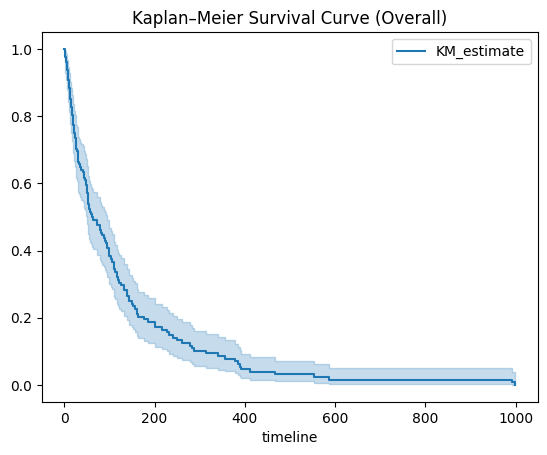

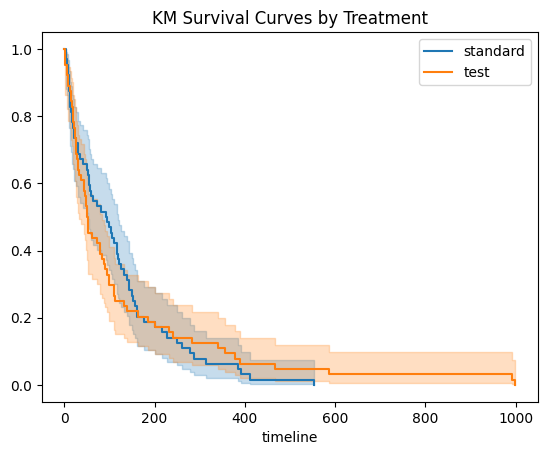

In [3]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Separate first and second rows per patient: Y=1 is death, Y=0 is start or censoring
df_event = df[df['Y'] == 1]

kmf = KaplanMeierFitter()

# Example: overall KM curve
kmf.fit(durations=df_event['TIME'], event_observed=df_event['Y'])
kmf.plot_survival_function()
plt.title('Kaplan–Meier Survival Curve (Overall)')
plt.show()

# Example by treatment group
for trt_group in df_event['trt'].unique():
    mask = df_event['trt'] == trt_group
    kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))
    kmf.plot_survival_function()

plt.title('KM Survival Curves by Treatment')
plt.show()

### Explanation - Kaplan–Meier Survival Curve (Overall)

This plot shows **how the probability of survival changes over time** for all patients in your dataset.

#### **Axes**

* **X-axis ("timeline")**:
  Time (in days) since the start of the study.
* **Y-axis ("KM\_estimate")**:
  Estimated **probability of survival** — starts at 1.0 (100%) and goes down over time.

---

### **Understanding the Curve**

* The curve **starts at 1.0** (100%) because **everyone is alive at the beginning**.
* The curve **drops in steps** — each drop represents a **patient dying**.
* The **flatter parts** of the curve mean that **no deaths happened during that time**.
* The curve continues dropping as more patients die over time.
* Around **time = 400–500**, the curve **levels off near zero**, meaning **very few patients are still surviving** after that time.

---

### **What the Shaded Area Means**

* The **blue shaded area around the curve** is the **confidence interval** — it shows the uncertainty in the estimate.
* A **wider shaded area** means **more uncertainty** (usually due to fewer patients left at that time).
* A **narrow shaded area** means **more confidence** in the survival estimate.

---

### Real-World Interpretation

* This graph shows that **most patients die within the first few hundred days** after starting treatment.
* Only a **very small number** survive beyond \~400–500 days.
* The steepness of the curve in the beginning means the **risk of death is highest early on**.

---

### Summary

| Visual Element        | What It Means                         |
| --------------------- | ------------------------------------- |
| **Steep drop**        | Many people died quickly              |
| **Flat area**         | No one died in that time range        |
| **Shaded area**       | How uncertain we are about the curve  |
| **Curve ends near 0** | Almost everyone has died by that time |


### The Second Plot **Kaplan–Meier survival curves by treatment**

This graph compares how long patients survive under two different treatment types: **"standard"** and **"test"**.

---

### **What This Graph Shows**

* **X-axis (timeline)**: Time in days since patients entered the study.
* **Y-axis (survival probability)**: The chance a patient is still alive at each time point.
* **Curves**:

  * **Blue line**: Patients who received the **standard** treatment.
  * **Orange line**: Patients who received the **test** (new) treatment.
* **Shaded regions**: Confidence intervals showing uncertainty around each survival estimate.

---

### **Explanation**

#### 1. **Both curves start at 1.0 (100%)**

* All patients are alive at the beginning.

#### 2. **Curves drop over time**

* Every drop means a group of patients died at that time.
* The steeper the drop, the more deaths in that time range.

#### 3. **Test vs Standard**

* In the early days (\~0–200), **test and standard** treatments have **similar steep drops**, but the **test** group (orange) seems to drop **faster initially**, meaning **fewer patients survive early on**.
* Around 200–400 days, both curves flatten, but the **test group eventually stays slightly above the standard group**, suggesting **slightly better long-term survival** for test treatment in later stages — though the difference is **small**.

#### 4. **Confidence Intervals (shaded areas) overlap**

* The shaded areas around each curve **overlap quite a bit**, especially after \~150 days.
* This means the difference in survival between the two groups might **not be statistically significant** — there's too much uncertainty to say for sure just from this plot.

---

### **Summary**

| Feature                      | Meaning                                                              |
| ---------------------------- | -------------------------------------------------------------------- |
| **Blue vs Orange Line**      | Different treatments being compared.                                 |
| **Steep drop**               | High number of deaths in that period.                                |
| **Flatter line**             | Most patients alive during that time.                                |
| **Confidence bands overlap** | The difference might not be meaningful or statistically significant. |
| **Ending near 0**            | Most patients in both groups eventually die.                         |



### **Median Survival Time**

**Median survival time** answers a simple but powerful question:

> **"How long did half the patients survive?"**

It is the time point where the survival probability drops to **50%** — meaning **half the patients have experienced the event** (e.g., death), and the other half are still alive or censored.

---

### **Why Use the Median Instead of the Mean?**

* The **mean (average)** survival time can be misleading when:

  * The data is **skewed** (e.g., a few patients live a very long time).
  * Some patients are still alive when the study ends (**censored data**).
* The **median is robust** to these issues and gives a clear, interpretable number.

---

## **Why we are calculating in current project**

We're analyzing **clinical trial data** comparing two treatments for lung cancer.

We're asking:

> “Which treatment helps patients live longer?”

So, **median survival time** helps us:

| Purpose                             | Why It Matters                                                                                                     |
| ----------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **Compare treatments**           | You can say: “The standard treatment had a median survival of 95 days, while the test treatment had only 52 days.” |
| **Summarize the curve**          | Rather than interpreting the whole curve, the median gives a single, meaningful statistic.                         |
| **Communicate results clearly**  | It's an intuitive number for doctors, patients, and stakeholders.                                                  |
| **Input for statistical models** | You can use it to build or validate models (like Cox regression).                                                  |

---

### Summary:

> **Median survival time** is a quick, clear way to compare how long patients live under different treatments — and it's especially useful in clinical research where not everyone is followed up to the end.

### Code Explanation


### `for trt_group in df_event['trt'].unique():`

* This is a **for loop** — it repeats the next steps for each **treatment group**.
* `df_event['trt']` is the column showing which treatment each patient received.
* `.unique()` gets all the **different treatment types** (like `"standard"` and `"test"`).

Simply we can state:

> “For each treatment group in the dataset, do the following...”

---

### `mask = df_event['trt'] == trt_group`

* This line **filters the data**.
* It creates a “mask” (a list of `True`/`False` values) that is `True` only for rows that belong to the current treatment group.

Simply we can state:

> “Find all patients who were in the current treatment group.”

---

### `kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))`

* This fits (trains) a **Kaplan–Meier model** using only the patients from that treatment group.
* `df_event[mask]['TIME']`: how long each patient lived.
* `df_event[mask]['Y']`: event status (1 means died).
* `label=str(trt_group)`: sets the label so the curve knows which group it's modeling.

Simply we can state:

> “Train the Kaplan–Meier model using only the patients in this group.”

---

### `print(f"Median survival for treatment {trt_group}: {kmf.median_survival_time_}")`

* This prints out the **median survival time** for that group.
* `kmf.median_survival_time_` automatically gives you the time at which survival drops to 50%.

Simply we can state:

> “Tell me how many days half the patients in this group survived.”

---

##  Output:

```plaintext
Median survival for treatment standard: 95.0
Median survival for treatment test: 52.0
```

Explanation:

* In the **standard treatment group**, half the patients survived **95 days or more**.
* In the **test treatment group**, half the patients only survived **52 days or more**.

---

## Summary

| Concept             | Meaning                                                     |
| ------------------- | ----------------------------------------------------------- |
| **Loop**            | Go through each group (e.g., "standard", "test") one by one |
| **Mask**            | Find the rows that match the group                          |
| **KM Fit**          | Train a survival model for that group                       |
| **Median Survival** | The time when 50% of patients are still alive               |


In [4]:
# Median survival time
for trt_group in df_event['trt'].unique():
    mask = df_event['trt'] == trt_group
    kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))
    print(f"Median survival for treatment {trt_group}: {kmf.median_survival_time_}")

Median survival for treatment standard: 95.0
Median survival for treatment test: 52.0


## Why Is the **Log-Rank Test** Conducted?

The **log-rank test** helps you answer this critical question:

> **“Is there a statistically significant difference in survival between two or more groups?”**

It doesn't just look at who lives longer — it checks if the observed difference is **real** or could have happened by **random chance**.

---

## What It Does

* It compares the **survival curves** of two or more groups (e.g., treatment groups).
* It looks at:

  * How many people are **expected to die** at each time point in each group,
  * How many actually did,
  * And whether that difference is **statistically significant**.

---

## Why we are doing it?

You're doing a **clinical trial survival analysis** comparing two treatments for lung cancer:

* `"standard"` treatment
* `"test"` (new or experimental) treatment

You already plotted Kaplan–Meier curves and calculated median survival times:

* Standard: **95 days**
* Test: **52 days**

But that **difference might not be enough**.

So now you ask:

> **“Is the difference in survival between these two treatments statistically significant?”**

That’s where the **log-rank test** comes in.

---

## 🔍 What Role It Plays

| Role                          | Why It Matters in Your Study                                                                        |
| ----------------------------- | --------------------------------------------------------------------------------------------------- |
| **Statistical validation** | It tells you if the survival difference between groups is **real** and not due to random variation. |
| **Supports conclusions**   | Without it, you can't confidently say one treatment is better based on survival time alone.         |
| **Needed for reporting**    | It’s standard in clinical trials and academic papers to prove group differences are significant.    |
| **Complements your plots** | Kaplan–Meier curves look different — but log-rank tells you if the difference is meaningful.        |

---

### Example:

If your **p-value < 0.05**, you can say:

> **"There is a statistically significant difference in survival between the standard and test treatment groups."**

If **p-value > 0.05**:

> "The observed difference in survival is **not statistically significant** — it may have happened by chance."

---

### Summary

* **Why**: To check if survival differences between groups are **real**.
* **What**: Compares how many patients die over time in each group.
* **When**: After plotting Kaplan–Meier curves or computing median survival times.
* **In your study**: Confirms whether the new treatment is **really better or worse** than the standard.

### **Purpose of the Code**

You're performing a **log-rank test**, a statistical test used to answer:

> **"Is there a significant difference in survival between two groups?"**

In your case, you're comparing two **treatment groups**: `"standard"` vs `"test"`.

---

## Step-by-Step Explanation

---

### `from lifelines.statistics import logrank_test`

* This **imports the `logrank_test` function** from the `lifelines` library.
* `lifelines` is a Python package that helps you do survival analysis (like what doctors use to study patient outcomes).
* The **log-rank test** checks if two survival curves are **statistically different**.

Simple Explanation:

> “I want to use the log-rank test function from the lifelines toolkit.”

---

### `group1 = df_event[df_event['trt'] == 'standard']`

* This **creates a new dataset called `group1`**.
* It filters rows from `df_event` where the treatment (`'trt'`) is `"standard"`.
* So now, `group1` contains **only patients who got the standard treatment**.

Simple Explanation:

> “Group 1 = patients who received the standard treatment.”

---

### `group2 = df_event[df_event['trt'] == 'test']`

* Same idea: this filters the data to include **only patients who got the test treatment**.

Simple Explanation:

> “Group 2 = patients who received the test treatment.”

---

### `results = logrank_test(group1['TIME'], group2['TIME'], event_observed_A=group1['Y'], event_observed_B=group2['Y'])`

* This line **runs the log-rank test** using survival data from both groups.
* `group1['TIME']`: the survival times for standard treatment group.
* `group2['TIME']`: the survival times for test treatment group.
* `event_observed_A=group1['Y']`: whether the patient died (1) or was censored (0).
* `event_observed_B=group2['Y']`: same, for test group.

Simple Explanation:

> “Compare how long patients survived in the two groups, and test if the difference is statistically significant.”

---

### `print(results.summary)`

* This **prints the results of the log-rank test**.
* The most important part is the **p-value**.

If the **p-value** is:

* Less than `0.05`: The difference in survival **is statistically significant**.
* Greater than `0.05`: There's **no strong evidence** of a difference.

Simple Explanation:

> “Show me the result of the test — especially the p-value.”

---


### Summary for Beginners

| Line of Code                   | What It Does                        |
| ------------------------------ | ----------------------------------- |
| `from ... import logrank_test` | Get the tool you need for the test  |
| `group1 = ...`                 | Get patients in group 1             |
| `group2 = ...`                 | Get patients in group 2             |
| `logrank_test(...)`            | Compare the survival of both groups |
| `print(results.summary)`       | Show the result and the p-value     |


### **Analyze Output**

```
   test_statistic        p     -log2(p)
0          0.0116     0.91423   0.129371
```

---

### What Each Column Means

| Column           | What It Means                                                      | In Simple Terms                                                                                       |
| ---------------- | ------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| `test_statistic` | The **test result value** from the log-rank test (like a "score"). | A measure of how different the survival curves are.                                                   |
| `p`              | The **p-value**.                                                   | The probability that the difference between groups happened **by random chance**.                     |
| `-log2(p)`       | The negative log base 2 of the p-value.                            | Used to highlight how small the p-value is on a log scale (more meaningful in some reports or plots). |

---

### Interpreting The Values

#### `test_statistic = 0.0116`

* This is a **very low test statistic**, meaning the **survival curves are almost the same**.
* The higher this value, the bigger the difference between groups — but in your case, it’s close to zero.

#### `p = 0.91423`

* This is the **p-value**, and it’s very high (close to 1).

* This tells you:

  > The difference in survival between the groups is **not statistically significant**.

* In most studies, if `p < 0.05`, we consider the difference **significant**.

* Since `0.91423 > 0.05`, we say:

  > “There is **no strong evidence** that survival differs between the two treatment groups.”

#### `-log2(p) = 0.129371`

* This is a transformed version of the p-value for certain types of visualizations (e.g., volcano plots).
* You can ignore this if you're just interested in testing significance.

---

### Final Interpretation

Your log-rank test result means:

> **The survival difference between the “standard” and “test” treatment groups is not statistically significant.**

In other words:

> "Even though their survival curves may look slightly different, the difference could easily be due to random variation."

---

### What You Can Do Next

* Report the result:
  *“The log-rank test gave a p-value of 0.91, indicating no significant difference in survival between the treatment groups.”*

* Consider checking:

  * **Sample size** — maybe there aren’t enough patients to detect a real difference.
  * **Hazard ratios** — use a **Cox model** to explore other factors affecting survival.

In [5]:
from lifelines.statistics import logrank_test

group1 = df_event[df_event['trt'] == 'standard']
group2 = df_event[df_event['trt'] == 'test']

results = logrank_test(group1['TIME'], group2['TIME'], event_observed_A=group1['Y'], event_observed_B=group2['Y'])
print(results.summary)


   test_statistic        p  -log2(p)
0          0.0116  0.91423  0.129371


## **Why We Use the Cox Proportional Hazards Model**

### **Purpose of CoxPH:**

To identify which **factors** (age, treatment, health score, etc.) influence **how long a patient survives** — and **by how much**.

> It answers:

> “Which variables significantly affect a patient’s risk of dying, and in what direction?”

---

### Think of It Like This:

Imagine two patients:

* Same age, but different treatments and health scores.
* Who is likely to survive longer — and why?

A **Kaplan–Meier curve** can show **overall survival patterns**, but:

* ❌ It **can’t handle multiple variables** at once.
* ❌ It **can’t adjust** for things like age, prior therapy, etc.
* ❌ It **can’t tell you the effect size** (e.g., "older patients have 20% higher risk").

That’s where **CoxPH comes in**.

---

## **In The Current Study**

You're analyzing data from a **lung cancer clinical trial** comparing two treatments (`standard` vs `test`), along with:

* **Age**
* **Karnofsky performance score (karno)**
* **Cancer cell type**
* **Prior therapy**
* **Time since diagnosis**

The **CoxPH model helps you**:

| What It Does                                     | Why It Matters                                                                                                              |
| ------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| **Quantifies effect of each variable**         | E.g., “Better health score (karno) reduces death risk by 3% per point.”                                                     |
| **Adjusts for other variables**                | E.g., If the test treatment seems worse, is it really because those patients were older or sicker? CoxPH accounts for that. |
| **Tells you what’s statistically significant** | Not every difference you see is meaningful — CoxPH tests that.                                                              |
| **Predicts survival risk**                     | For a given patient profile, you can estimate their survival hazard.                                                        |
| **Ranks most important factors**               | E.g., Karnofsky score is much more predictive than prior therapy.                                                           |

---

## Example From The Output

| Variable         | Effect                                                                          |
| ---------------- | ------------------------------------------------------------------------------- |
| `karno`          | Statistically significant — higher scores = lower risk                         |
| `trt_test`       | Not statistically significant — test treatment is not clearly better or worse  |
| `celltype_large` | Significant — lower risk compared to baseline                                  |

This tells you:

> “In this study, treatment type did **not** have a strong effect, but patient health status and cancer type **did**.”

---

## Summary

| Concept           | In Plain Language                                                                          |
| ----------------- | ------------------------------------------------------------------------------------------ |
| **Kaplan–Meier**  | Shows how survival drops over time in each group.                                          |
| **Log-rank test** | Tests if survival is significantly different between groups.                               |
| **CoxPH model**   | Shows which factors influence survival and by how much — **adjusted for everything else**. |

---

### Why CoxPH is Important in This Study:

> "It gives us a **clear, statistical, and adjusted** picture of which patient factors and treatments truly affect survival — and helps us decide what really works."

## 1. Code — Line by Line

```python
from lifelines import CoxPHFitter
```

📦 **Import the CoxPH model** from the `lifelines` package.

---

```python
# Prepare wide-format data: one row per subject
df_wide = df_event.copy()
```

Make a copy of `df_event` (the death rows).
Each patient has only **one row**, with all information like age, treatment, etc.

---

```python
# Encode categorical variables
df_wide = pd.get_dummies(df_wide, columns=['trt', 'celltype', 'priortherapy'], drop_first=True)
```

Convert text columns (like `'trt'`, `'celltype'`, `'priortherapy'`) into **numeric dummy variables** so the model can use them.

`drop_first=True` avoids duplication by skipping the first category.

---

```python
cph = CoxPHFitter()
```

Create the **Cox Proportional Hazards model** object.

---

```python
cph.fit(df_wide, duration_col='TIME', event_col='Y')
```

Train (fit) the model:

* `TIME`: how long each patient survived
* `Y`: 1 = died (event happened), 0 = censored

---

```python
cph.print_summary()
```

Print a table showing the **effects of each variable** on survival (we’ll interpret this below!).

---

```python
cph.plot()
plt.show()
```

Show a graph of the **log hazard ratios (HRs)** with confidence intervals (explained below).

---

## 2. Interpreting the Output Table

### Columns to Focus On:

| Column                 | Meaning                                                              |
| ---------------------- | -------------------------------------------------------------------- |
| `coef`                 | Effect size on log scale                                             |
| `exp(coef)`            | Hazard Ratio (HR): **>1 means higher risk**, **<1 means lower risk** |
| `p`                    | P-value — is the effect statistically significant?                   |
| `coef lower/upper 95%` | Confidence range for the effect                                      |
| `z`                    | Z-score: larger = more significant                                   |
| `Concordance`          | Accuracy of the model (like % correctness)                           |

---

### Example Rows Interpreted

#### `karno`: -0.03, HR = 0.97, p < 0.005 ✅

* For every 1-point increase in **Karnofsky score** (better health), the risk of death **decreases** by 3%.
* **Statistically significant**.

#### `celltype_large`: HR = 0.43, p = 0.02 ✅

* Patients with **large cell** cancer have **lower hazard** than the baseline group.
* **Significant result**.

#### `trt_test`: HR = 1.17, p = 0.88 ❌

* Test treatment group has **slightly higher risk**, but not statistically significant (p > 0.05).

#### `priortherapy_yes`: HR = 1.20, p = 0.43 ❌

* Prior therapy seems to increase risk, but this is **not significant**.

---

### Overall Model Stats

| Metric                                          | Meaning                                                      |
| ----------------------------------------------- | ------------------------------------------------------------ |
| `Concordance = 0.74`                            | **74% accurate** at predicting survival order — pretty good! |
| `Partial AIC = 948.43`                          | Model quality measure (lower is better).                     |
| `Log-likelihood ratio test = 62.38 (p < 0.005)` | The model as a whole is **statistically significant**.       |

---

## 3. Interpreting the Graph

### What It Shows:

* **Each row** = one variable (like age, treatment, cell type, etc.)
* **Square box** = estimated log(HR) (log hazard ratio)
* **Horizontal line** = 95% confidence interval (CI)
* **Vertical dashed line at 0** = no effect

### How to Read It:

| Element                                         | What it Means                                               |
| ----------------------------------------------- | ----------------------------------------------------------- |
| Box **left of 0** (and CI does not cross 0)  | Lower risk (protective effect) — significant                |
| Box **right of 0** (and CI does not cross 0) | Higher risk (harmful effect) — significant                  |
| CI crosses the 0 line                         | The result is **not significant** — could be no real effect |

---

### Examples from Your Graph:

* `karno`: Box is left of 0 → Better health reduces risk ✅
* `celltype_large`: CI doesn’t cross 0 → Significant protective effect ✅
* `trt_test`: Long CI, crosses 0 → Not significant ❌

---

## Summary

| Part                 | Purpose                                                           |
| -------------------- | ----------------------------------------------------------------- |
| Code              | Trains a Cox model to study how each factor affects survival time |
| Table             | Shows risk (HR), confidence intervals, and significance           |
| Plot              | Visual summary of which variables are risky, safe, or unclear     |
| Concordance = 0.74 | Model is reasonably accurate at predicting who dies sooner        |

<lifelines.CoxPHFitter: fitted with 128 total observations, 0 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 128
number of events observed = 128
   partial log-likelihood = -465.21
         time fit was run = 2025-05-22 18:20:44 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
ID                  0.00      1.00      0.01           -0.03            0.03                0.97                1.03
karno              -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
age                -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
trt_test            0.16      1.17      1.02           -1.84            2.16                0.16                8.63
celltype_large     -0.83      0.43      0.36           -1.53           -0.14                0.22                0.87
celltype_smallcell -0.12      0.88      0.38           -0.88            0.63                0.42                1.88
celltype_squamous  -0.97      0.38      0.66           -2.27            0.33                0.10                1.38
priortherapy_yes    0.18      1.20      0.24           -0.28            0.65                0.76                1.91

                    cmp to     z      p  -log2(p)
covariate                                        
ID                    0.00  0.20   0.84      0.25
karno                 0.00 -6.08 <0.005     29.60
diagtime              0.00 -0.47   0.63      0.66
age                   0.00 -1.54   0.12      3.02
trt_test              0.00  0.16   0.88      0.19
celltype_large        0.00 -2.34   0.02      5.71
celltype_smallcell    0.00 -0.32   0.75      0.42
celltype_squamous     0.00 -1.47   0.14      2.82
priortherapy_yes      0.00  0.79   0.43      1.21
---
Concordance = 0.74
Partial AIC = 948.43
log-likelihood ratio test = 62.38 on 9 df
-log2(p) of ll-ratio test = 31.00

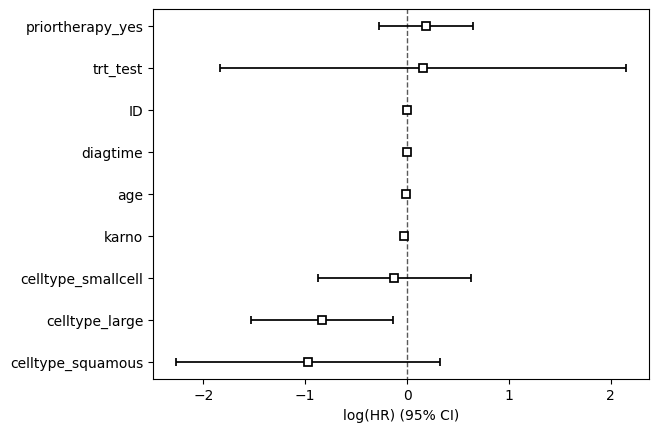

In [6]:
from lifelines import CoxPHFitter

# Prepare wide-format data: one row per subject
df_wide = df_event.copy()

# Encode categorical variables
df_wide = pd.get_dummies(df_wide, columns=['trt', 'celltype', 'priortherapy'], drop_first=True)

cph = CoxPHFitter()
cph.fit(df_wide, duration_col='TIME', event_col='Y')
cph.print_summary()
cph.plot()
plt.show()

##  **Time-Varying Survival Analysis**

### What Is It?

**Time-varying survival analysis** is used when **something about the patient or their environment changes over time** and might affect their risk of the event (like death).

> Unlike traditional models (like CoxPH), time-varying models can **handle covariates that change during follow-up**, not just stay constant.

---

## **Why It Matters in Clinical Studies**

### Real-life Example:

* A patient starts a cancer treatment.
* After 3 months, their **health score drops** or **they switch therapies**.
* Their **risk of death may now be different** than when the study began.

**Standard models** would ignore this change.
**Time-varying models** can **adjust the risk** as the situation evolves.

---

## **In the Context of The Current Study**

You are analyzing survival among lung cancer patients and comparing two treatments (standard vs test). Each patient has:

* Two time points: one for the start (`Y=0`), and one for the death or censoring (`Y=1`).
* Some covariates (like treatment type or prior therapy) may **influence risk over time** or might **not apply equally** throughout the study.

### So why use time-varying survival analysis here?

| Purpose                                        | Why It Matters in Your Study                                                                                        |
| ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Handle multiple time points per patient** | Your dataset has **two rows per patient** (start and death) — a perfect setup for time-varying analysis.            |
| **Model changing risk**                     | The patient’s condition (or exposure to risk) may change between those points.                                      |
| **More realistic assumptions**              | Standard CoxPH assumes constant hazard over time — which may not hold true in your data.                            |
| **Better for advanced designs**             | If later you include **lab results or treatment switches** that vary during follow-up, this method can handle that. |
| **Enables interval-based modeling**         | Lets you create risk intervals (e.g., 0–100 days, 100–200 days) and see when risk changes most.                     |

---

### What It Allows You To Do

| Feature                                                     | Benefit                                      |
| ----------------------------------------------------------- | -------------------------------------------- |
| Split each patient’s time into **start and stop intervals** | Analyze survival during each part separately |
| Use updated or repeated measures (e.g., changing therapy)   | Improves prediction accuracy                 |
| Allows **more flexible modeling**                           | Adapts to real-world clinical scenarios      |

---

## Summary

| Concept                  | Meaning                                                                                |
| ------------------------ | -------------------------------------------------------------------------------------- |
| **Standard CoxPH model** | Assumes patient’s risk stays the same the whole time.                                  |
| **Time-varying model**   | Allows risk to change over time or due to time-updated variables.                      |
| **Why you need it**      | Your data has two rows per patient — perfect for modeling changes from start to death. |
| **What it improves**     | Accuracy, realism, and clinical relevance of your survival analysis.                   |

This code is **preparing a dataset** for a **time-varying survival analysis** (like with a Cox time-varying model). The dataset originally has **two rows per patient** — one for the start of observation, and one for the event (death or censoring).

---

## Code Explanation – Line by Line

---

### `# Step 1: Separate rows by Y`

```python
df_start = df[df["Y"] == 0].copy()   # Start of observation/censoring
df_event = df[df["Y"] == 1].copy()   # Death
```

* `df["Y"] == 0` picks rows where the **event hasn’t happened yet** — this is the **start** of the patient's observation period or censoring.
* `df["Y"] == 1` picks rows where the **event (death)** has happened.
* `.copy()` makes a **safe copy** of each part.
* `df_start` now holds each patient’s **start time**.
* `df_event` holds each patient’s **stop time and death info**.

**Why?**
We need one clear **start** and one **stop** for each patient to build a time interval for survival models.

---

### `# Step 2: Merge on ID`

```python
# Bring over TIME as stop and Y as event
df_event = df_event.rename(columns={"TIME": "stop", "Y": "event"})
df_start = df_start.rename(columns={"TIME": "start"})
```

* Renames columns:

  * `'TIME'` becomes `'start'` for the `df_start` (start of follow-up).
  * `'TIME'` becomes `'stop'`, and `'Y'` becomes `'event'` in `df_event`.
* This prepares for combining both parts cleanly.

Now you have:

* `start`: when observation started.
* `stop`: when death or censoring occurred.
* `event`: 1 = died, 0 = censored.

---

```python
df_timevarying = pd.merge(
    df_start,
    df_event[["ID", "stop", "event"]],
    on="ID"
)
```

* This **merges** the two datasets (`df_start` and `df_event`) using the `'ID'` column.
* You now have one row per patient with:

  * `start`, `stop`, `event`, and all other variables.

Final result: A **time interval** dataset ready for survival modeling.

---

### `# Step 3: One-hot encode categorical variables`

```python
df_timevarying = pd.get_dummies(df_timevarying, columns=["trt", "celltype", "priortherapy"], drop_first=True)
```

* Categorical columns like `'trt'`, `'celltype'`, `'priortherapy'` are in text format.
* `pd.get_dummies()` converts them into **numeric columns** (0 or 1) so that machine learning models can understand them.
* `drop_first=True` prevents duplication by dropping the first category as a reference.

Example:
If `'trt'` has `"standard"` and `"test"`, you'll only get a column like `trt_test`:

* 1 = test
* 0 = standard (baseline group)

---

### `# Final check`

```python
print(df_timevarying[['ID', 'start', 'stop', 'event']].head())
```

* This just **prints the first 5 rows** of key columns to confirm that:

  * `start` and `stop` times are correctly built
  * Each patient has one clean row
  * Ready for fitting a **Cox time-varying model**

---

## ✅ Summary

| Step              | What It Does                                      |
| ----------------- | ------------------------------------------------- |
| Split data        | Separates start rows and death rows               |
| Rename columns    | Creates clear `start`, `stop`, and `event` labels |
| Merge rows        | Combines both rows into one row per patient       |
| Encode categories | Converts text to numbers (required for modeling)  |
| Print check       | Confirms the data looks right before modeling     |



In [7]:
# Step 1: Separate rows by Y
df_start = df[df["Y"] == 0].copy()   # Start of observation/censoring
df_event = df[df["Y"] == 1].copy()   # Death

# Step 2: Merge on ID
# Bring over TIME as stop and Y as event
df_event = df_event.rename(columns={"TIME": "stop", "Y": "event"})
df_start = df_start.rename(columns={"TIME": "start"})

df_timevarying = pd.merge(
    df_start,
    df_event[["ID", "stop", "event"]],
    on="ID"
)

# Step 3: One-hot encode categorical variables
df_timevarying = pd.get_dummies(df_timevarying, columns=["trt", "celltype", "priortherapy"], drop_first=True)

# Final check
print(df_timevarying[['ID', 'start', 'stop', 'event']].head())


   ID  start  stop  event
0   1      0    72      1
1   2      0   411      1
2   3      0   228      1
3   4      0   126      1
4   5      0   118      1


In [8]:
import numpy as np

# Check for NaNs
print("Any NaNs?", df_timevarying.isnull().values.any())

# Check for infinite values
print("Any Infs?", np.isinf(df_timevarying.select_dtypes(include=[np.number])).values.any())

Any NaNs? False
Any Infs? False


In [9]:
print(df_timevarying[df_timevarying.isnull().any(axis=1)])
print(df_timevarying[np.isinf(df_timevarying.select_dtypes(include=[np.number])).any(axis=1)])


Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []
Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []


## Line-by-Line Explanation

> “We’re checking that the column `'Y'` is not accidentally left in the dataset we’ll use for modeling.”

---

### `if 'Y' in df_timevarying.columns:`

This line **checks**:

* "Is there a column called `'Y'` in the DataFrame `df_timevarying`?"

✅ If yes → it moves to the next line
❌ If no → it skips the next line

**Why?** Because `'Y'` (used earlier) is now **redundant or incorrect** — we’ve already renamed it to `'event'`.

---

### `df_timevarying.drop(columns=['Y'], inplace=True)`

If the `'Y'` column exists:

* This line **removes** it from the dataset.
* `inplace=True` means the change is made **directly in the current DataFrame** — no need to create a new one.

Simply Put:

> "Delete the `'Y'` column from the data because we don’t need it anymore — and it might mess up the model."

---

## Why Is This Step Required?

### You already did this earlier:

```python
df_event = df_event.rename(columns={"TIME": "stop", "Y": "event"})
```

That means:

* `'Y'` was **renamed to `'event'`**, and you're already using `'event'` for modeling.
* But in merging and joining steps, the **original `'Y'` might sneak back in**.

### If you leave `'Y'` in:

* The Cox model might try to **include it as a feature** (variable),
* But `'Y'` contains values like 0/1 that **don’t change over time** (and are not needed anymore),
* It could cause **errors or misleading results**.

---

## Summary

| Code Line             | What It Does                               |
| --------------------- | ------------------------------------------ |
| `if 'Y' in ...`       | Check if the old column `'Y'` still exists |
| `drop(columns=['Y'])` | Safely delete `'Y'` because it’s outdated  |
| `inplace=True`        | Make the change directly in the dataset    |


**Why it's needed**:
To **clean your data** before modeling and **avoid using the wrong variable** by mistake.

In [10]:
# Ensure 'Y' is not in the modeling data
if 'Y' in df_timevarying.columns:
    df_timevarying.drop(columns=['Y'], inplace=True)

## **Cox Time-Varying Coefficients**

In survival analysis, the **Cox model** estimates how each variable (like age, treatment, or health score) affects a patient’s **risk of the event** (like death).

But in the **time-varying Cox model**, these effects can change over time or across different intervals — instead of staying constant like in the regular Cox model.

---

## Why We Need Cox Time-Varying Coefficients

| Problem                                                 | Time-Varying Coefficients Solve It                              |
| ------------------------------------------------------- | --------------------------------------------------------------- |
| Standard Cox model assumes constant risk over time      | Time-varying model **lets risk change** over time               |
| Some variables may affect survival only **temporarily** | Time-varying model can **detect those changes**                 |
| Patient data may include multiple **time intervals**    | Model adjusts risk per interval                                 |
| You may want to see **dynamic impact** of treatment     | Time-varying coefficients show how **treatment effects evolve** |

---

## In the Context of Your Clinical Trial

### You’re analyzing:

* **Lung cancer patients**
* Each patient has two time points (start and death/censoring)
* Covariates like:

  * **Treatment type**
  * **Health score (karno)**
  * **Cell type**
  * **Prior therapy**

---

### What Time-Varying Coefficients Tell You:

| Insight                                         | Meaning                                                                  |
| ----------------------------------------------- | ------------------------------------------------------------------------ |
| A covariate’s effect **decreases over time** | E.g., the **benefit of treatment fades** after a few months              |
| A covariate’s effect **increases over time** | E.g., **older age becomes riskier** in later stages                      |
| The effect is **stable**                     | The risk is **constant** over the observation period                     |
| Model reacts to **changing intervals**       | You track risk across start/stop durations (e.g., 0–100 days vs 100–200) |

---

## What It Lets You Do

| Benefit                         | Why It Matters                                                               |
| ------------------------------- | ---------------------------------------------------------------------------- |
| More accurate risk prediction | Accounts for real-world changes over time                                    |
| Dynamic insight              | See when a treatment works best (or loses effectiveness)                     |
| Better clinical decisions    | Helps doctors understand **when and for whom** a treatment is most effective |
| Enhanced model flexibility   | Useful if you ever use **longitudinal health data** or real-time monitoring  |

---

## Summary

| Concept                       | In Simple Words                                                                                 |
| ----------------------------- | ----------------------------------------------------------------------------------------------- |
| **CoxPH model**               | Estimates constant effect of each variable on survival                                          |
| **Time-varying Cox model**    | Allows the effect (risk) to **change over time**                                                |
| **Time-varying coefficients** | Show how variables like treatment or age **influence risk differently** as time goes on         |
| **In your study**             | It helps analyze survival more **realistically**, using both time intervals and patient changes |

---

### Why It’s Valuable in Current Study

> “Cox time-varying coefficients help us understand how the **impact of treatment and other patient factors evolve over time**, giving us a more accurate picture of survival risk in lung cancer patients.”

## Code Explanation

This code fits a **Cox Time-Varying survival model** using your cleaned and transformed dataset.
---

### `from lifelines import CoxTimeVaryingFitter`

* You are **importing** the Cox Time-Varying model tool from the `lifelines` library.
* This model is specially designed to handle **data that changes over time** — like patients with start/stop intervals or time-varying covariates.

Simply Put:

> "I want to use the time-varying survival model from the lifelines toolkit."

---

### `ctv = CoxTimeVaryingFitter()`

* This **creates** a new, empty Cox Time-Varying model.
* The variable `ctv` will store the trained model later.

Think of it like opening a blank survival model calculator that you'll fill with data.

---

### `ctv.fit(...)`

```python
ctv.fit(
    df_timevarying,
    id_col='ID',
    start_col='start',
    stop_col='stop',
    event_col='event'
)
```

Here you're **fitting the model** (i.e., training it with your data).

| Parameter           | Meaning                                                       |
| ------------------- | ------------------------------------------------------------- |
| `df_timevarying`    | Your cleaned dataset with start/stop time intervals           |
| `id_col='ID'`       | Patient identifier — groups rows belonging to the same person |
| `start_col='start'` | When observation begins for each row                          |
| `stop_col='stop'`   | When observation ends (event or censoring)                    |
| `event_col='event'` | Whether the patient died (1) or was censored (0)              |

Simply Put:

> “Train the model using the time intervals for each patient, and learn how their variables affect survival.”

---

### `ctv.print_summary()`

* Prints a **table of results** from the model.
* You’ll see:

  * The effect of each variable on survival
  * Hazard ratios
  * Confidence intervals
  * P-values (to see which variables are significant)

Simply Put:

> “Show me the math behind the model — which variables increase or decrease the risk of death?”

---

### `ctv.plot()`

* This creates a **graph** of the model’s coefficients (effects of each variable).
* Variables that **increase** risk are shown to the **right of 0**, and those that **reduce** risk are to the **left of 0**.
* It includes **confidence intervals** to show certainty of the estimate.

Simply Put:

> “Draw a chart that shows how strongly each variable affects survival.”

---

### `plt.title("Cox Time-Varying Coefficients")`

* Adds a **title** to the chart so it’s easier to understand.

---

### `plt.show()`

* **Displays** the chart.
* Without this line, nothing would show up if you're using Jupyter or a notebook.

---

## Summary

| Line                     | What It Does                                                      |
| ------------------------ | ----------------------------------------------------------------- |
| `CoxTimeVaryingFitter()` | Loads the model tool                                              |
| `.fit(...)`              | Trains the model using your patient time intervals                |
| `.print_summary()`       | Shows numeric results (like which variables are significant)      |
| `.plot()`                | Draws a visual of which variables increase or decrease death risk |

---

### Why It’s Important in Your Study

This step lets you:

* Model **how survival is affected across time intervals**
* See the **impact of treatments and patient characteristics**
* Identify which variables are **statistically significant predictors** of death
* Make your model **more accurate and realistic** by using real patient follow-up intervals

<lifelines.CoxTimeVaryingFitter: fitted with 128 periods, 128 subjects, 128 events>
         event col = 'event'
number of subjects = 128
 number of periods = 128
  number of events = 128
partial log-likelihood = -465.24
  time fit was run = 2025-05-22 18:21:20 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
karno              -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
age                -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
trt_test            0.36      1.44      0.21           -0.05            0.77                0.95                2.17
celltype_large     -0.80      0.45      0.30           -1.38           -0.21                0.25                0.81
celltype_smallcell -0.18      0.84      0.28           -0.72            0.36                0.49                1.44
celltype_squamous  -1.10      0.33      0.30           -1.68           -0.51                0.19                0.60
priortherapy_yes    0.18      1.19      0.23           -0.28            0.63                0.76                1.88

                    cmp to     z      p  -log2(p)
covariate                                        
karno                 0.00 -6.07 <0.005     29.52
diagtime              0.00 -0.45   0.65      0.61
age                   0.00 -1.53   0.12      3.00
trt_test              0.00  1.72   0.08      3.56
celltype_large        0.00 -2.65   0.01      6.95
celltype_smallcell    0.00 -0.65   0.52      0.96
celltype_squamous     0.00 -3.66 <0.005     11.94
priortherapy_yes      0.00  0.76   0.45      1.17
---
Partial AIC = 946.47
log-likelihood ratio test = 62.34 on 8 df
-log2(p) of ll-ratio test = 32.53

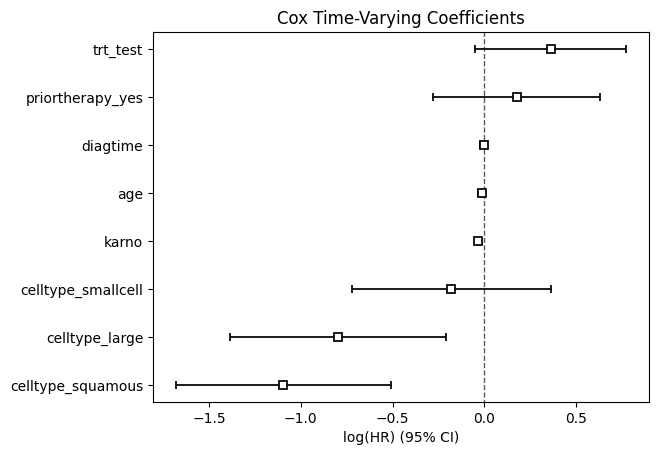

In [11]:
from lifelines import CoxTimeVaryingFitter

# Initialize the Cox time-varying model
ctv = CoxTimeVaryingFitter()

# Fit the model using the transformed dataframe
ctv.fit(
    df_timevarying,
    id_col='ID',
    start_col='start',
    stop_col='stop',
    event_col='event'  # This reflects the renamed column
)

# Print model summary
ctv.print_summary()

# Plot coefficients
ctv.plot()
plt.title("Cox Time-Varying Coefficients")
plt.show()

## Model Overview

| Metric                                      | Meaning                                                              |
| ------------------------------------------- | -------------------------------------------------------------------- |
| `model`                                     | You used **CoxTimeVaryingFitter** from the `lifelines` library       |
| `event col = 'event'`                       | You used the correct event indicator (1 = death, 0 = censored)       |
| `number of subjects = 128`                  | You had **128 unique patients** in the dataset                       |
| `number of periods = 128`                   | Each patient had **one time interval (start → stop)**                |
| `number of events = 128`                    | All patients **died (Y = 1)** — no censoring in this case            |
| `partial log-likelihood = -465.24`          | A technical measure used for comparing models (lower = worse)        |
| `Partial AIC = 946.47`                      | AIC is used to compare models — lower is better                      |
| `log-likelihood ratio test = 62.34 on 8 df` | Overall, the model is **statistically significant** with 8 variables |
| `-log2(p) = 32.53`                          | This is a very strong signal — your model has predictive power     |

---

## Coefficients Table — Interpretation

Let’s now go row by row through the table of variables:

| Variable                | `exp(coef)` | p-value    | What It Means                                                                                                                                       |
| ----------------------- | ----------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **karno**               | 0.97        | `<0.005` ✅ | Patients with higher Karnofsky score (better health) have a **lower risk of death**. Each 1-point increase = 3% lower risk. **Highly significant.** |
| **diagtime**            | 1.00        | `0.65` ❌   | Time since diagnosis has **no meaningful impact** on survival here.                                                                                 |
| **age**                 | 0.99        | `0.12` ❌   | Older age **may slightly increase risk**, but it's **not statistically significant**.                                                               |
| **trt\_test**           | 1.44        | `0.08` ⚠️  | Patients in the test treatment group had **44% higher risk of death**, but this is **not statistically significant** at p < 0.05 (just borderline). |
| **celltype\_large**     | 0.45        | `0.01` ✅   | Patients with large-cell cancer had **55% lower risk of death** vs the reference group. **Significant.**                                            |
| **celltype\_smallcell** | 0.84        | `0.52` ❌   | Slightly lower risk than the baseline, but **not statistically significant**.                                                                       |
| **celltype\_squamous**  | 0.33        | `<0.005` ✅ | Patients with squamous cell type had **67% lower risk**. **Highly significant.**                                                                    |
| **priortherapy\_yes**   | 1.19        | `0.45` ❌   | Prior therapy increased risk by 19%, but **not significant**.                                                                                       |

---

## How to Interpret `exp(coef)` (Hazard Ratio)

| Value | Meaning                               |
| ----- | ------------------------------------- |
| `> 1` | **Increases** risk of death (harmful) |
| `< 1` | **Decreases** risk (protective)       |
| `= 1` | No effect                             |

---

## Key Takeaways from the Model

| Finding                                                                   | Meaning                                                      |
| ------------------------------------------------------------------------- | ------------------------------------------------------------ |
| ✅ **Karnofsky score is a strong protective factor**                       | Healthier patients live longer — clear and significant.      |
| ✅ **Squamous and large-cell cancer types are associated with lower risk** | Compared to the reference cell type.                         |
| ⚠️ **Treatment group (`trt_test`) shows higher risk** but not significant | Needs more data or investigation.                            |
| ❌ **Age, prior therapy, and diagnosis time are not significant**          | They don't seem to strongly affect survival in this dataset. |

---

## Summary

> In this Cox time-varying survival model of 128 lung cancer patients, the **Karnofsky score**, **cell type (squamous and large-cell)** were significant predictors of survival. Patients in the **test treatment group had a 44% higher hazard**, but this was **not statistically significant** (p = 0.08). Age, prior therapy, and time since diagnosis showed no significant effects.

## What the Graph Shows

### **X-axis (`log(HR)` or log of Hazard Ratio)**:

* Measures the **effect size** of each variable on survival (in log scale).
* **Left of 0**: Lower risk of death (protective).
* **Right of 0**: Higher risk of death (harmful).
* The further from 0 → the stronger the effect.

---

### 🔲 **Boxes**: Estimated effect (log hazard)

* Each square box is the **model’s estimate** for that variable.

### ➖ **Horizontal lines (error bars)**: Confidence Intervals (95% CI)

* Show the **range of uncertainty** around each estimate.
* If the line **crosses the vertical line at 0**, the effect is **not statistically significant**.

---

## How to Interpret Each Variable

| Variable                | Box Position       | Crosses 0? | Meaning                                                                                         |
| ----------------------- | ------------------ | ---------- | ----------------------------------------------------------------------------------------------- |
| **trt\_test**           | Right of 0         | ✅ Yes      | Patients on **test treatment** had slightly higher risk, but **not statistically significant**. |
| **priortherapy\_yes**   | Right of 0         | ✅ Yes      | Prior therapy shows slightly increased risk, but again **not significant**.                     |
| **diagtime**            | Close to 0         | ✅ Yes      | No meaningful effect — not significant.                                                         |
| **age**                 | Slightly left of 0 | ✅ Yes      | Slight risk reduction with age — but **not significant**.                                       |
| **karno**               | Left of 0          | ❌ No       | **Protective effect** (better health score → lower risk), and **statistically significant** ✅   |
| **celltype\_smallcell** | Left of 0          | ✅ Yes      | Possibly protective, but **not significant**.                                                   |
| **celltype\_large**     | Left of 0          | ❌ No       | **Protective effect**, statistically significant ✅                                              |
| **celltype\_squamous**  | Far left           | ❌ No       | Strong **protective effect**, highly significant ✅                                              |

---

## Summary of Key Insights from the Plot

✅ **Significant Predictors** (CIs **do not cross** 0):

* `karno` (Karnofsky score): Healthier patients live longer.
* `celltype_large`: Patients with large-cell cancer have better survival.
* `celltype_squamous`: Strong protective effect — much lower risk of death.

⚠️ **Not Significant** (CIs **cross** 0):

* `trt_test`: Higher risk with test treatment, but not significant.
* `priortherapy_yes`: Slightly harmful, but not significant.
* `age`, `diagtime`, `celltype_smallcell`: No strong effect shown.

---

## Summary

> “The time-varying Cox model showed that Karnofsky performance score and tumor cell types (large and squamous) were significantly associated with better survival. Test treatment showed a higher hazard ratio than standard treatment, but this difference was not statistically significant.”

In [12]:
print(df_timevarying.columns)

Index(['ID', 'start', 'karno', 'diagtime', 'age', 'stop', 'event', 'trt_test',
       'celltype_large', 'celltype_smallcell', 'celltype_squamous',
       'priortherapy_yes'],
      dtype='object')


Earlier the data has two rows per patient (like Monolix output), and you're trying to manually build survival input.

Now the data has one row per patient, with:

`TIME` = survival/censoring time

`Y = 1` if died, `0` if censored

So we fit `KaplanMeierFitter` again



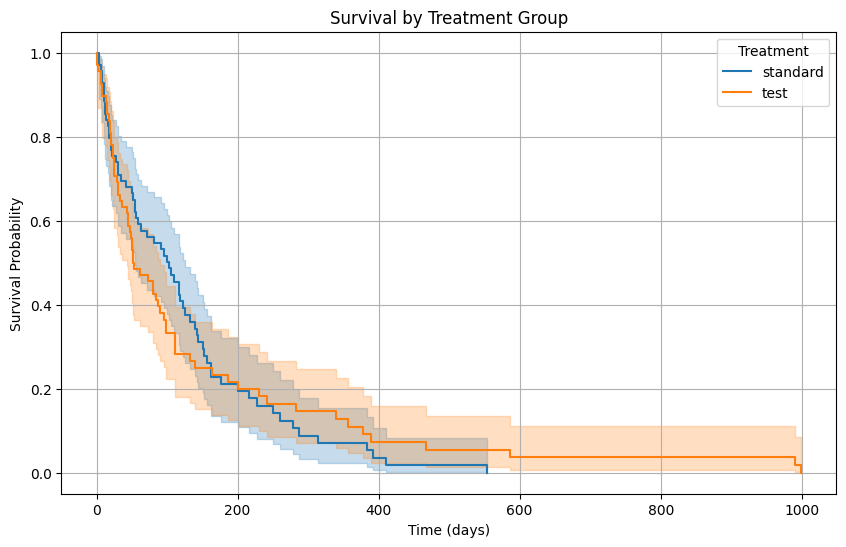

In [13]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group in df['trt'].unique():
    label = str(group)
    mask = df['trt'] == group
    kmf.fit(df[mask]['TIME'], event_observed=df[mask]['Y'], label=label)
    kmf.plot_survival_function()

plt.title('Survival by Treatment Group')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title="Treatment")
plt.show()


**Kaplan–Meier survival plot** comparing two treatment groups — `"standard"` and `"test"` — from a lung cancer clinical trial.

## **What This Graph Shows**

### Title: **"Survival by Treatment Group"**

This chart shows the **probability of surviving over time** for two different treatment groups.

### Blue Line: **Standard Treatment**

### Orange Line: **Test Treatment**

---

## **Axes**

* **X-axis (Time in days)**
  Shows how long patients were followed in the study (0 to \~1000 days).

* **Y-axis (Survival Probability)**
  The chance that a patient is still alive at each point in time.
  Starts at 1.0 (100% alive) and drops as patients die.

---

## **How to Read the Lines**

* Each **step down** in the line means **one or more patients died** at that time.
* A **steep drop** means **many deaths happened quickly**.
* A **flatter section** means **patients survived longer during that time**.

---

## **What This Graph Tells You**

| Observation                                               | Meaning                                         |
| --------------------------------------------------------- | ----------------------------------------------- |
| **Both lines drop quickly at the beginning**           | Most patients die in the first few hundred days |
| **Test group has slightly higher survival early on**   | Suggests a possible short-term benefit          |
| **Standard group drops more quickly after \~200 days** | Could mean higher risk in that group            |
| **Test group flattens after \~600 days**               | A few long-term survivors in test group         |
| **Both groups reach near 0% survival by the end**      | Very few patients live beyond \~600–1000 days   |

---

## **Confidence Intervals (Shaded Areas)**

* The **shaded regions** around each line represent **uncertainty** — the wider the shaded area, the **less confidence** we have in the estimate.
* **Overlap between the bands** means there's **no clear statistical difference** in survival between the groups — **visually**.

---

## Summary

* This graph shows that **most patients died within the first 400–500 days**, regardless of treatment.
* The **test group may have slightly better long-term survival**, but...
* The **shaded regions overlap**, meaning the **difference might not be statistically significant**.
* You'll need a **log-rank test** or **Cox model** to confirm if the difference is meaningful.

---

### Overall

> “Kaplan–Meier curves show rapid early decline in survival for both treatment groups. The test treatment appears to have slightly better survival beyond 400 days, but overlapping confidence intervals suggest the difference may not be statistically significant.”


In [14]:
print(df['trt'].value_counts())

trt
standard    138
test        136
Name: count, dtype: int64


The goal here is to **statistically test** if there is a **significant difference in survival** between two treatment groups (e.g., "standard" vs "test") using the **log-rank test**.

---

## Step-by-Step Code Explanation

---

### `from lifelines.statistics import logrank_test`

* You are importing the **log-rank test function** from the `lifelines` library.
* This test compares survival curves between two groups.

Simply Put:

> “Bring in the tool that can tell me if survival is different between two groups.”

---

### `group1 = df[df['trt'] == 'standard']`

* This filters the DataFrame `df` to create **Group 1** — patients who received the **standard treatment**.

---

### `group2 = df[df['trt'] == 'test']`

* Now you're correctly comparing `"standard"` vs `"test"` treatment groups.

---

### `results = logrank_test(...)`

```python
results = logrank_test(
    group1['TIME'], group2['TIME'],
    event_observed_A=group1['Y'],
    event_observed_B=group2['Y']
)
```

| Parameter          | Meaning                                                             |
| ------------------ | ------------------------------------------------------------------- |
| `group1['TIME']`   | Survival times for the **standard group**                           |
| `group2['TIME']`   | Survival times for the **test group**                               |
| `event_observed_A` | Whether each patient in group1 **died (Y=1)** or was censored (Y=0) |
| `event_observed_B` | Same for group2                                                     |

This line runs the actual **log-rank test**, comparing the two survival curves.

---

### `print(f"Log-Rank Test p-value: {results.p_value:.4f}")`

* Prints the **p-value** from the test with 4 decimal places.

---

### `if results.p_value < 0.05:`

* Checks if the p-value is **less than 0.05** (the common threshold for significance).

---

### Result Messages:

```python
if results.p_value < 0.05:
    print("→ Significant difference in survival.")
else:
    print("→ No statistically significant difference.")
```

* This tells you:

  * If the survival difference is **real and statistically significant**
  * Or if it could have happened by chance (p > 0.05)


In [15]:
from lifelines.statistics import logrank_test

# Assuming 'trt' column has two treatment types (e.g., 1 = Standard, 2 = Test)
group1 = df[df['trt'] == 'standard']
group2 = df[df['trt'] == 'test']

# Perform the log-rank test using correct event column: 'Y'
results = logrank_test(
    group1['TIME'], group2['TIME'],
    event_observed_A=group1['Y'],
    event_observed_B=group2['Y']
)

# Output
print(f"Log-Rank Test p-value: {results.p_value:.4f}")
if results.p_value < 0.05:
    print("→ Significant difference in survival.")
else:
    print("→ No statistically significant difference.")

Log-Rank Test p-value: 0.9277
→ No statistically significant difference.


### `import pandas as pd`

* This **imports the pandas library**, which is used to handle and analyze data in table (DataFrame) format.

---

### `from lifelines import CoxPHFitter`

* You are importing the **CoxPHFitter** from the `lifelines` library.
* This model is used to study how different variables affect the **time until an event** (like death) happens.

Think of it like a tool that tells you:

> “Which patient features increase or decrease the risk of death?”

---

### `df_encoded = pd.get_dummies(df, columns=['celltype', 'trt', 'priortherapy'], drop_first=True)`

* This converts **categorical variables** (text data like `"squamous"` or `"test"`) into **numbers**.
* `get_dummies()` creates new columns with `0` or `1` (also called **one-hot encoding**).
* `drop_first=True` avoids duplicating categories by removing the first one (used as the baseline).

In plain English:

> "Convert treatment, cell type, and prior therapy into numeric form for modeling."

---

### `celltype_dummies = [col for col in df_encoded.columns if col.startswith('celltype_')]`

* This collects all columns that start with `'celltype_'` into a list.
* These are your **encoded cancer cell types**.

---

### `treatment_dummies = [col for col in df_encoded.columns if col.startswith('treatment_')]`

* Similar logic: finds columns that start with `'treatment_'`.

---

### `prior_dummies = [col for col in df_encoded.columns if col.startswith('prior_')]`

* Collects dummy variables for **prior therapy**.

---

### `features = ['TIME', 'Y', 'age', 'karno', 'diagtime'] + celltype_dummies + treatment_dummies + prior_dummies`

* This builds a complete list of **all the features** (columns) to include in the Cox model:

  * Basic columns: `'TIME'`, `'Y'`, `'age'`, `'karno'`, `'diagtime'`
  * Plus the **encoded versions** of cell type, treatment, and prior therapy.

In plain English:

> "List everything I want to use in the survival model."

---

### `cox_df = df_encoded[features]`

* Creates a new DataFrame (`cox_df`) that contains **only** the selected columns from the previous step.

---

### `cph = CoxPHFitter()`

* Creates an **empty Cox model** object that you're about to train.

---

### `cph.fit(cox_df, duration_col='TIME', event_col='Y')`

* Fits (trains) the model using your data.
* `duration_col='TIME'`: How long each patient was followed.
* `event_col='Y'`: Whether the patient died (`Y=1`) or was censored (`Y=0`).

In plain English:

> "Use the data to learn which factors affect how long patients survive."

---

### `cph.print_summary()`

* Prints a **detailed table** showing:

  * Each variable’s effect
  * Hazard ratios (`exp(coef)`)
  * Confidence intervals
  * P-values (for significance)

This helps answer:

> “Which variables significantly impact survival time, and how?”

---

## Summary

| Step             | What It Does                                                  |
| ---------------- | ------------------------------------------------------------- |
| Import libraries | Bring in pandas and lifelines                                 |
| Encode variables | Convert text labels into numeric format                       |
| Select features  | Choose which columns to include in the model                  |
| Train Cox model  | Fit a model to learn what affects patient survival            |
| View results     | See which features increase or decrease risk, and by how much |


In [16]:
import pandas as pd
from lifelines import CoxPHFitter

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['celltype', 'trt', 'priortherapy'], drop_first=True)

# Collect celltype dummy variables
celltype_dummies = [col for col in df_encoded.columns if col.startswith('celltype_')]
treatment_dummies = [col for col in df_encoded.columns if col.startswith('treatment_')]
prior_dummies = [col for col in df_encoded.columns if col.startswith('prior_')]

# Define final feature set
features = ['TIME', 'Y', 'age', 'karno', 'diagtime'] + celltype_dummies + treatment_dummies + prior_dummies

# Prepare dataset
cox_df = df_encoded[features]

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='TIME', event_col='Y')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 274 total observations, 146 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 274
number of events observed = 128
   partial log-likelihood = -475.48
         time fit was run = 2025-05-22 18:22:02 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
age                -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
karno              -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
diagtime            0.00      1.00      0.01           -0.01            0.02                0.99                1.02
celltype_large     -0.86      0.42      0.30           -1.44           -0.28                0.24                0.75
celltype_smallcell -0.46      0.63      0.26           -0.98            0.05                0.38                1.05
celltype_squamous  -1.18      0.31      0.30           -1.76           -0.60                0.17                0.55

                    cmp to     z      p  -log2(p)
covariate                                        
age                   0.00 -0.63   0.53      0.92
karno                 0.00 -5.86 <0.005     27.65
diagtime              0.00  0.37   0.71      0.49
celltype_large        0.00 -2.91 <0.005      8.13
celltype_smallcell    0.00 -1.78   0.07      3.74
celltype_squamous     0.00 -4.00 <0.005     13.97
---
Concordance = 0.74
Partial AIC = 962.96
log-likelihood ratio test = 59.94 on 6 df
-log2(p) of ll-ratio test = 34.33

## What Is a **Competing Risk**?

A **competing risk** is an event that:

* **Prevents** the event you’re studying from happening, or
* **Changes the likelihood** that it happens.

> In simple terms: It’s an **alternative outcome** that **"competes"** with your primary event.

---

### Example

You’re studying **survival in lung cancer patients**, and your **event of interest** is:

* **Death due to lung cancer**.

But patients might also:

* Die from a **heart attack** 🫀,
* Die from **another disease** (like COVID-19),
* Be **censored** (drop out or survive until study ends).

Here:

* **Death from other causes** = **competing risks** because they **prevent you from observing** death due to lung cancer.

---

## Why It Matters

### Problem with Standard Survival Models (like Kaplan–Meier or Cox PH)

* These models treat **all other events** (like heart attack) as **censoring**.
* That assumes patients who die of other causes **might have died of cancer later**, which isn’t true.
* This leads to:

  * **Overestimation** of lung cancer death risk,
  * **Biased results**, especially in older patients or long-term studies.

---

### How Competing Risks Analysis Helps

| Benefit                               | Why It Matters                                                                |
| ------------------------------------- | ----------------------------------------------------------------------------- |
| Models **each event separately**   | Distinguishes between cancer death and other deaths                           |
| Gives **realistic risk estimates** | Tells you the actual chance of dying from cancer, accounting for other causes |
| Guides **treatment evaluation**    | A treatment might reduce cancer deaths but not all-cause deaths               |
| Matches real-world clinical logic  | Doctors care **why** a patient died, not just whether                         |

---

## What You Use: **Fine–Gray Model**

* Estimates **Cumulative Incidence Function (CIF)**:

  * The **real probability** of experiencing your specific event (e.g., death by cancer),
  * **Adjusted for competing risks** (e.g., death by heart attack).

---

## Why It’s Important in Your Study

You’re analyzing **lung cancer survival**, where patients may:

* Die from cancer,
* Die from unrelated causes (especially if they’re older or sicker),
* Be censored.

**If you only use standard models**, you:

* May **misrepresent treatment effects**,
* May **overestimate survival benefit**,
* Can’t tell if a treatment **improves cancer-specific survival**, or just **delays all-cause death**.

Using a **competing risks model** gives you:

* A more **clinically meaningful** and **statistically accurate** analysis.

---

## Summary

| Term                | What It Means                                                      |
| ------------------- | ------------------------------------------------------------------ |
| **Competing risk**  | A different event that stops your event of interest from happening |
| **Example**         | Dying of heart attack before dying of lung cancer                  |
| **Why important**   | Helps avoid overestimating cancer risk and misjudging treatment    |
| **Fine–Gray model** | A method to model specific risk while accounting for others        |